In [47]:
from glob import glob as glob
import os
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
results_root="/storage/czw/btbench/outputs/btbench_popt_lite/"

In [49]:
split = "DS_DM"
split_paths = glob(os.path.join(results_root, split, "*", "results.json"))

In [50]:
all_records = []
for path in split_paths:
    result_name = path.split("/")[-2]
    sub_name = "_".join(result_name.split("_")[1:3])
    sub_id = int(sub_name[len("sub_"):])
    trial_name = result_name.split("_")[3]
    trial_id = int(trial_name[len("trial"):])

    task_name = "_".join(result_name.split("_")[4:])
    if "frozen" in task_name:
        task_name = task_name.split("_frozen_")[0]
   
    with open(path, "r") as f:
        results = json.load(f)
        
        for k in range(len(results)):
            test_roc_auc = results[k]["test_roc_auc"]
        
            all_records.append({
                "subject_name": sub_name,
                "trial_name": trial_name,
                "subject_id": sub_id,
                "trial_id": trial_id,
                "fold": k,
                "task_name": task_name,
                "test_roc_auc": test_roc_auc

            })
results_df = pd.DataFrame.from_records(all_records)

In [51]:
5*19*12

1140

In [52]:
eval_tasks = ["frame_brightness", "global_flow", "local_flow", "global_flow_angle", "local_flow_angle", "face_num", "volume", "pitch", "delta_volume", "delta_pitch", "speech", "onset", "gpt2_surprisal", "word_length", "word_gap", "word_index", "word_head_pos", "word_part_speech", "speaker"]
lite_trials = {"sub_1": ["trial001", "trial002"], "sub_2": ["trial000", "trial004"], "sub_3": ["trial001", "trial000"], "sub_4": ["trial001", "trial000"], "sub_5": ["trial000"], "sub_6": ["trial000"], "sub_7": ["trial001", "trial000"], "sub_8": ["trial000"], "sub_9": ["trial000"], "sub_10": ["trial001", "trial000"]}

In [53]:
count = 0
for sub in lite_trials:
    if len(lite_trials[sub])==1:
        continue
    for trial in lite_trials[sub]:
        for task in eval_tasks:
            count += 5
            sub_id = int(sub[len("sub_"):])
            trial_id = int(trial[len("trial"):])
            if len(results_df[(results_df.subject_id==sub_id) & (results_df.trial_id==trial_id) & (results_df.task_name==task)]) == 0:
                print(sub, trial, task)

# print(count)

sub_2 trial000 frame_brightness
sub_2 trial000 global_flow
sub_2 trial000 local_flow
sub_2 trial000 global_flow_angle
sub_2 trial000 local_flow_angle
sub_2 trial000 face_num
sub_2 trial000 volume
sub_2 trial000 pitch
sub_2 trial000 delta_volume
sub_2 trial000 delta_pitch
sub_2 trial000 speech
sub_2 trial000 onset
sub_2 trial000 gpt2_surprisal
sub_2 trial000 word_length
sub_2 trial000 word_gap
sub_2 trial000 word_index
sub_2 trial000 word_head_pos
sub_2 trial000 word_part_speech
sub_2 trial000 speaker
sub_2 trial004 frame_brightness
sub_2 trial004 global_flow
sub_2 trial004 local_flow
sub_2 trial004 global_flow_angle
sub_2 trial004 local_flow_angle
sub_2 trial004 face_num
sub_2 trial004 volume
sub_2 trial004 pitch
sub_2 trial004 delta_volume
sub_2 trial004 delta_pitch
sub_2 trial004 speech
sub_2 trial004 onset
sub_2 trial004 gpt2_surprisal
sub_2 trial004 word_length
sub_2 trial004 word_gap
sub_2 trial004 word_index
sub_2 trial004 word_head_pos
sub_2 trial004 word_part_speech
sub_2 trial

In [54]:
mean_df = results_df.groupby("task_name").mean("test_roc_auc").sort_values(by="test_roc_auc")

In [55]:
mean_df

,subject_id,trial_id,fold,test_roc_auc
task_name,,,,
global_flow,5.0,0.7,0.0,0.492144
local_flow,5.0,0.7,0.0,0.493682
word_length,5.0,0.7,0.0,0.494224
speaker,5.0,0.7,0.0,0.498575
word_part_speech,5.0,0.7,0.0,0.499148
global_flow_angle,5.0,0.7,0.0,0.501902
delta_pitch,5.0,0.7,0.0,0.502073
volume,5.0,0.7,0.0,0.505825
frame_brightness,5.0,0.7,0.0,0.506053


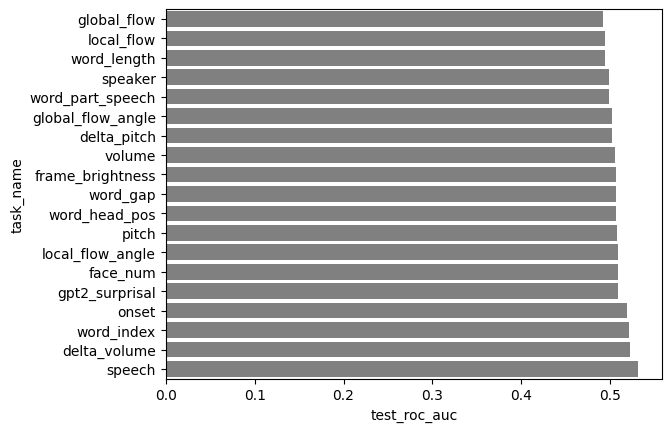

In [56]:
ax = sns.barplot(y=mean_df.index, x="test_roc_auc", data=mean_df, color='grey')


In [57]:
results_df.to_csv(f"popt_{split}_results.csv", index=False)

In [64]:
pwd

'/storage/czw/btbench/notebooks'

In [58]:
f"popt_{split}_results.csv"

'popt_DS_DM_results.csv'

In [59]:
all_subject_trials = list([f"{x}_{y}" for (x,y) in zip(list(results_df.subject_id),list(results_df.trial_id))])

In [60]:
import numpy as np
np.unique(all_subject_trials, return_counts=True)

(array(['10_0', '10_1', '1_1', '1_2', '3_0', '3_1', '4_0', '4_1', '7_0',
        '7_1'], dtype='<U4'),
 array([19, 19, 19, 19, 19, 19, 19, 19, 19, 19]))

In [61]:
5*19

95

In [63]:
# results_df.mean

In [65]:
![SegmentLocal](movie.gif "segment")

/shells/bash: -c: line 1: syntax error near unexpected token `movie.gif'
/shells/bash: -c: line 1: `[SegmentLocal](movie.gif "segment")'
